Shape of the dataset: (1228, 4)
First 50 rows of the dataset:
    Unnamed: 0    TxnDate  Unnamed: 2  Consumption
0        76229  01-Jan-22         NaN        1.010
1        76258  01-Jan-22         NaN        0.908
2        76287  01-Jan-22         NaN        0.926
3        76316  01-Jan-22         NaN        0.928
4        76345  01-Jan-22         NaN        0.916
5        76374  01-Jan-22         NaN        0.972
6        76403  01-Jan-22         NaN        0.878
7        76432  01-Jan-22         NaN        1.902
8        76461  01-Jan-22         NaN        0.900
9        76490  01-Jan-22         NaN        0.928
10       76512  01-Jan-22         NaN        0.994
11       76548  01-Jan-22         NaN        1.850
12       76577  01-Jan-22         NaN        0.896
13       76606  01-Jan-22         NaN        0.964
14       76635  01-Jan-22         NaN        0.906
15       76664  01-Jan-22         NaN        0.904
16       76693  01-Jan-22         NaN        0.904
17       76722  01-J

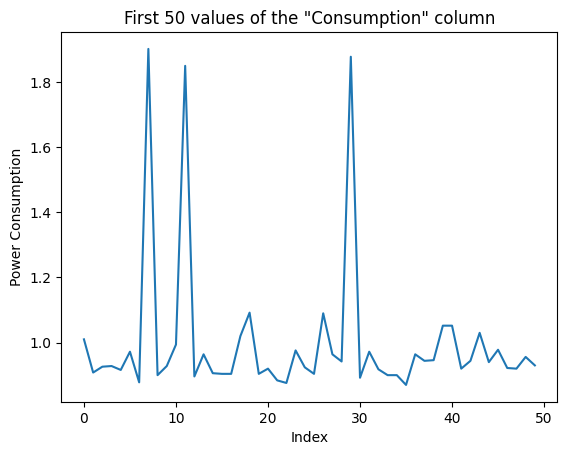

MA Model Mean Squared Error (MSE): 10.432931935593897


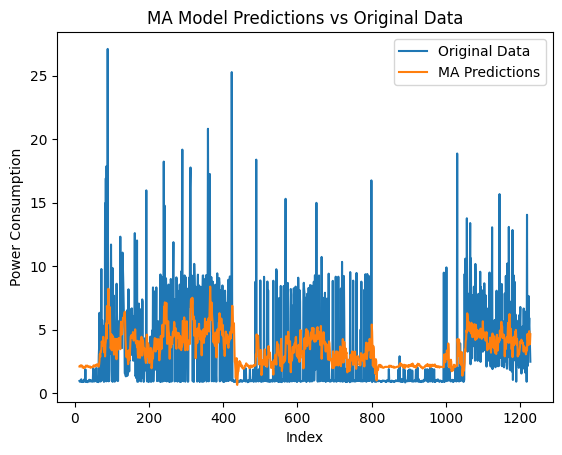

Exponential Smoothing Mean Squared Error (MSE): 9.941359866424898


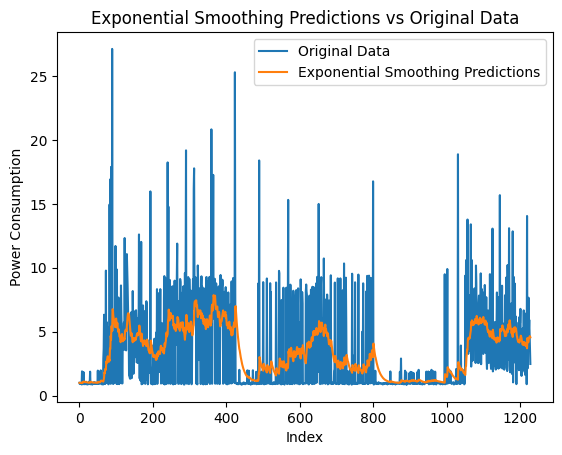

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv("/content/KwhConsumptionBlower78_1.csv")
print("Shape of the dataset:", data.shape)
print("First 50 rows of the dataset:")
print(data.head(50))

# Plot the first 50 values of the "Consumption" column
plt.plot(data['Consumption'].head(50))
plt.title('First 50 values of the "Consumption" column')
plt.xlabel('Index')
plt.ylabel('Power Consumption')
plt.show()

# 1. Moving Average (MA) Model
# MA model with a lag order of 13
lag_order = 13
ma_model = ARIMA(data['Consumption'], order=(0, 0, lag_order))  # (p=0, d=0, q=lag_order)
ma_model_fit = ma_model.fit()

# Predictions from MA model
ma_predictions = ma_model_fit.predict(start=lag_order, end=len(data)-1)
ma_mse = mean_squared_error(data['Consumption'][lag_order:], ma_predictions)
print('MA Model Mean Squared Error (MSE):', ma_mse)

# Plot the original data vs MA model predictions
plt.plot(data['Consumption'][lag_order:], label='Original Data')
plt.plot(ma_predictions, label='MA Predictions')
plt.title('MA Model Predictions vs Original Data')
plt.xlabel('Index')
plt.ylabel('Power Consumption')
plt.legend()
plt.show()

# 2. Exponential Smoothing Model
# Exponential smoothing with trend and seasonal components
exp_smoothing_model = ExponentialSmoothing(data['Consumption'], trend='add', seasonal=None, seasonal_periods=None)
exp_smoothing_fit = exp_smoothing_model.fit()

# Predictions from Exponential Smoothing
exp_smoothing_predictions = exp_smoothing_fit.fittedvalues
exp_smoothing_mse = mean_squared_error(data['Consumption'], exp_smoothing_predictions)
print('Exponential Smoothing Mean Squared Error (MSE):', exp_smoothing_mse)

# Plot the original data vs Exponential Smoothing predictions
plt.plot(data['Consumption'], label='Original Data')
plt.plot(exp_smoothing_predictions, label='Exponential Smoothing Predictions')
plt.title('Exponential Smoothing Predictions vs Original Data')
plt.xlabel('Index')
plt.ylabel('Power Consumption')
plt.legend()
plt.show()
